In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [82]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('/Users/adityagulalia/Desktop/ALL FILES/Insurance-Cost-Prediction/DATA/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
df.info(verbose=True, max_cols=None)
print(df.shape)

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB
(1338, 7)


In [84]:
missing = df.isnull().sum().sort_values(ascending=False)
missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [85]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [86]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
categorical_col = df.select_dtypes(include=['str']).columns

print("Numerical Columns:", numerical_col)
print("Categorical Columns:", categorical_col)

Numerical Columns: Index(['age', 'bmi', 'children', 'charges'], dtype='str')
Categorical Columns: Index(['sex', 'smoker', 'region'], dtype='str')


In [87]:
df[numerical_col].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


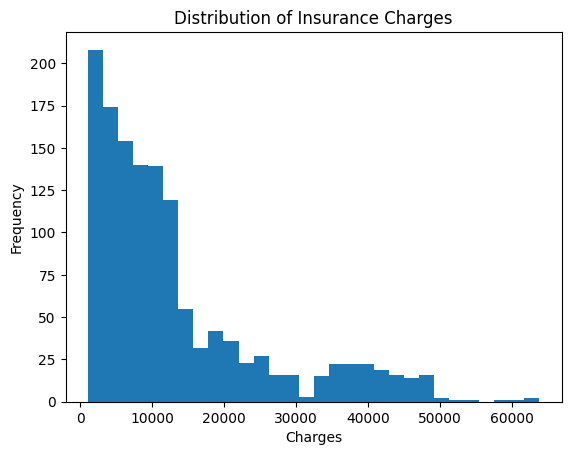

In [88]:
plt.hist(df["charges"] , bins=30)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Insurance Charges")
plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

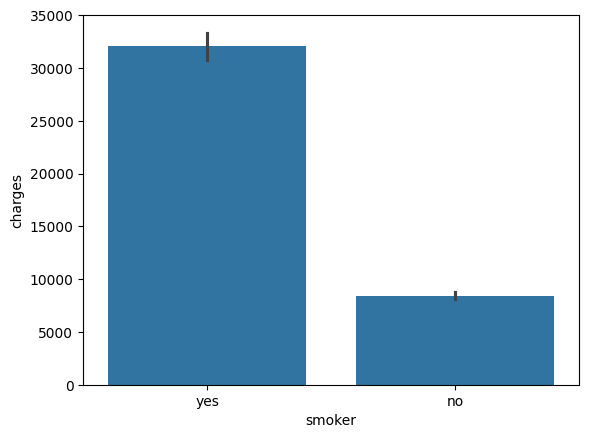

In [89]:
sns.barplot(x='smoker', y='charges', data=df)

In [90]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded['charges'] = np.log(df_encoded['charges'])
output = df_encoded['charges']
input = df_encoded.drop('charges',axis=1)

In [91]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,False,True,False,False,True
1,18,33.770,1,7.453302,True,False,False,True,False
2,28,33.000,3,8.400538,True,False,False,True,False
3,33,22.705,0,9.998092,True,False,True,False,False
4,32,28.880,0,8.260197,True,False,True,False,False


In [92]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [93]:
reg = LinearRegression()
reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [94]:
y_pred = reg.predict(X_test)

In [95]:
from sklearn.model_selection import cross_val_score

cross_val_score(reg, X_train, y_train, cv=5)  

array([0.7150413 , 0.81325977, 0.75397276, 0.69818574, 0.77594767])

In [96]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 0.2696916350040462
RMSE: 0.4190157084978038
R² Score: 0.8047311493462987


In [97]:
coeff = pd.Series(reg.coef_, index=input.columns)
print(coeff.sort_values(ascending=False))


smoker_yes          1.551698
children            0.092448
age                 0.034245
bmi                 0.013600
region_northwest   -0.056414
sex_male           -0.074350
region_southwest   -0.122557
region_southeast   -0.136068
dtype: float64
